# The dasaset is been taken from the http://insideairbnb.com/bristol/ . The Bristol city Datastet is been used for the analysis 
## http://insideairbnb.com/bristol/
## http://insideairbnb.com/get-the-data/

In [1]:
# Import the pandas library and it as "pd"
import pandas as pd 

# Import the seaborn library and it as "sns"
import seaborn as sns 

# Import the matplotlib.pyplot library and it as "plt"
import matplotlib.pyplot as plt 


In [5]:
airbnb_df = pd.read_csv("listings.csv")

In [3]:
print("The shape of the dataset is ", air.shape)

The shape of the dataset is  (2260, 18)


In [4]:
air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,70820,City View - Sarah's double room.,360195,Sarah,NaN,Windmill Hill,51.43994,-2.59173,Private room,41,3,179,2022-09-22,1.60,5,0,19,NaN
1,117122,City Centre-Waterside Retreat,591555,Marcus,NaN,Clifton,51.45051,-2.61054,Private room,96,1,172,2022-12-11,1.23,1,357,18,NaN
2,176306,The White Room - Central Bristol Art House Ga...,708175,Orla,NaN,Bedminster,51.44101,-2.60121,Private room,32,5,43,2022-11-23,0.35,1,33,4,NaN
3,307634,"'The Sunset Room' Peaceful, Clear Home",1582810,Wendy,NaN,Easton,51.46641,-2.55533,Private room,38,6,31,2022-11-29,0.46,3,169,7,NaN
4,341227,Listed Georgian house in the heart of Bristol.,237360,Samantha,NaN,Ashley,51.46661,-2.58709,Entire home/apt,664,2,109,2022-10-02,0.84,1,89,11,NaN


C:\Users\Deep.ai\AppData\Local\Temp\ipykernel_16872\1429273188.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_neighbourhoods_df['last_review'] = pd.to_datetime(top_neighbourhoods_df['last_review'])


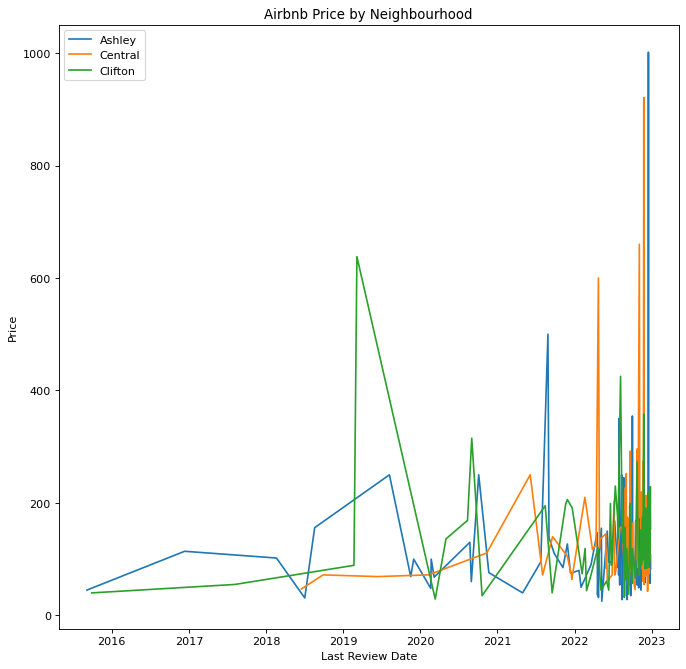

In [15]:
from matplotlib.pyplot import figure

# Read the Airbnb dataset into a pandas dataframe

def plot_top_neighbourhoods(df, n):
    """
    Creates a line plot of the price of the top n neighborhoods in the Airbnb dataset over time.
    
    Parameters:
        df (pandas dataframe): The dataframe containing the Airbnb data.
        n (int): The number of top neighborhoods to plot.
    
    Returns:
        None
    """
    # Group the dataframe by the 'neighbourhood' column, count the number of occurrences of each neighborhood, and sort in descending order
    neighbourhood_counts = df.groupby('neighbourhood').size().sort_values(ascending=False)

    # Get the names of the top n neighborhoods
    top_neighbourhoods = neighbourhood_counts.head(n).index.tolist()

    # Filter the dataframe to only include rows for the top n neighborhoods
    top_neighbourhoods_df = df[df['neighbourhood'].isin(top_neighbourhoods)]

    # Convert the 'last_review date' column to a datetime data type
    top_neighbourhoods_df['last_review'] = pd.to_datetime(top_neighbourhoods_df['last_review'])

    # Group the dataframe by the 'neighbourhood' and 'last_review date' columns and compute the mean price for each group
    grouped_df = top_neighbourhoods_df.groupby(['neighbourhood', 'last_review'])['price'].mean().reset_index()

    # Create a plot with multiple lines, one for each top neighborhood
    figure(figsize=(10, 10), dpi=80)
    for neighbourhood in top_neighbourhoods:
        neighbourhood_df = grouped_df[grouped_df['neighbourhood'] == neighbourhood]
        plt.plot(neighbourhood_df['last_review'], neighbourhood_df['price'], label=neighbourhood)
    
	
    # Set the axis labels and plot title
    plt.xlabel('Last Review Date')
    plt.ylabel('Price')
    plt.title('Airbnb Price by Neighbourhood')

    # Add a legend to the plot
    plt.legend()

# Call the plot_top_neighbourhoods function to create a line plot for the top 5 neighborhoods in the Airbnb dataset
plot_top_neighbourhoods(airbnb_df, 3)


C:\Users\Deep.ai\AppData\Local\Temp\ipykernel_16872\1429273188.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_neighbourhoods_df['last_review'] = pd.to_datetime(top_neighbourhoods_df['last_review'])


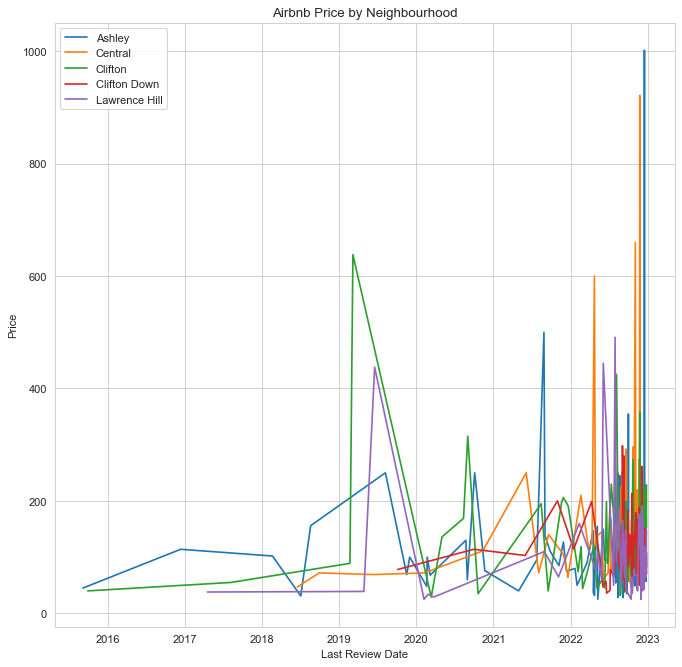

In [27]:
plot_top_neighbourhoods(airbnb_df, 5)

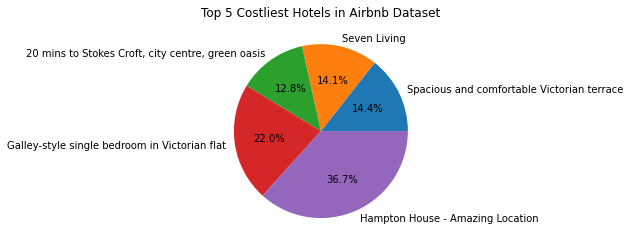

In [16]:

def plot_top_costliest_hotels(df, n):
    """
    Creates a pie chart of the top n costliest hotels in the Airbnb dataset, based on the mean price per hotel.
    
    Parameters:
        df (pandas dataframe): The dataframe containing the Airbnb data.
        n (int): The number of top costliest hotels to plot.
    
    Returns:
        None
    """
    # Compute the mean price per hotel and sort in descending order
    hotel_prices = df.groupby('name')['price'].mean().sort_values(ascending=False)

    # Get the names of the top n costliest hotels
    top_hotels = hotel_prices.head(n).index.tolist()

    # Filter the dataframe to only include rows for the top n costliest hotels
    top_hotels_df = df[df['name'].isin(top_hotels)]

    # Compute the total price for each top hotel
    top_hotels_total_price = top_hotels_df.groupby('name')['price'].sum()

    # Create a pie chart of the top n costliest hotels
    plt.pie(top_hotels_total_price, labels=top_hotels, autopct='%1.1f%%')

    # Set the plot title
    plt.title('Top {} Costliest Hotels in Airbnb Dataset'.format(n))

# Call the plot_top_costliest_hotels function to create a pie chart for the top 5 costliest hotels in the Airbnb dataset
plot_top_costliest_hotels(airbnb_df, 5)


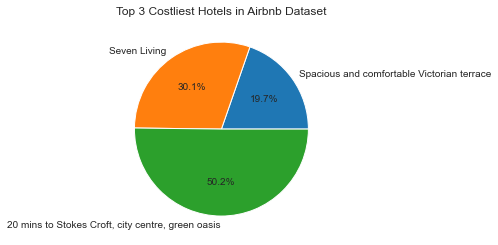

In [25]:
plot_top_costliest_hotels(airbnb_df, 3)


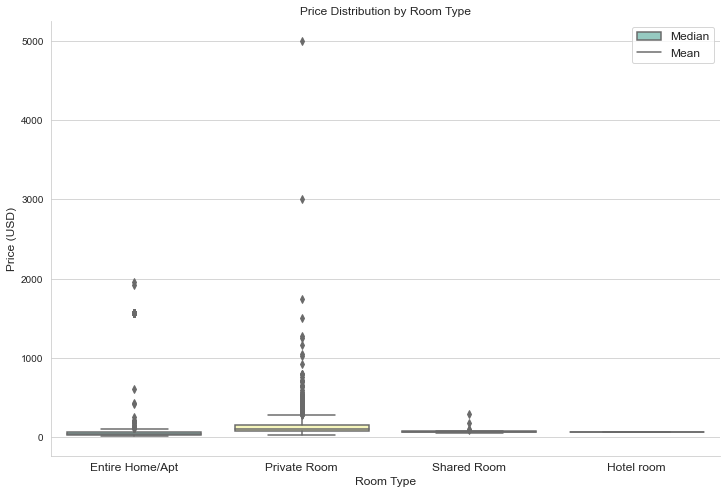

In [24]:
def plot_price_by_room_type(df):
    """
    Creates a more beautiful and descriptive box plot of the price by room type in the Airbnb dataset.
    
    Parameters:
        df (pandas dataframe): The dataframe containing the Airbnb data.
    
    Returns:
        None
    """
    # Set the plot style and size
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))

    # Create the box plot of the price by room type, with outliers and whiskers shown
    ax = sns.boxplot(x='room_type', y='price', data=df, palette='Set3', showfliers=True, whis=1.5)

    # Set the plot title and labels
    ax.set_title('Price Distribution by Room Type')
    ax.set_xlabel('Room Type', fontsize=12)
    ax.set_ylabel('Price (USD)', fontsize=12)

    # Remove the top and right spines from the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add custom labels to the x-axis ticks
    ax.set_xticklabels(['Entire Home/Apt', 'Private Room', 'Shared Room' , 'Hotel room'], fontsize=12)

    # Add mean and median lines to each box, with custom colors and linewidths
    for i in range(len(ax.artists)):
        # Get the median line and set its color and linewidth
        ax.lines[i*2 + 1].set_color('r')
        ax.lines[i*2 + 1].set_linewidth(2)

        # Get the mean line and set its color and linewidth
        ax.lines[i*2 + 2].set_color('g')
        ax.lines[i*2 + 2].set_linewidth(2)

    # Add a legend to the plot
    ax.legend({'Median': 'r', 'Mean': 'g'}, loc='upper right', fontsize=12)

    # Show the plot
    plt.show()

# Call the plot_price_by_room_type function to create a more beautiful and descriptive box plot of the price and room_type in the Airbnb dataset
plot_price_by_room_type(airbnb_df)